# STADS Machine Learning Kurs
## Workshop 2 : Neuronale Netze

TensorFlow ist aktuell eines der wichtigsten Frameworks zur Programmierung von neuronalen Netzen, Deep Learning Modellen und anderen Machine Learning Algorithmen. Es basiert auf einem C++ Low Level Backend, das jedoch über eine Python Library gesteuert wird. TensorFlow lässt sich sowohl auf CPU als auch GPU (Clustern) ausführen.

In [1]:
import pandas as pd
import tensorflow as tf

Zuerst laden wir Daten hoch - wir arbeiten mit german.csv Daten.

In [2]:
#load data
data=pd.read_csv('/Users/agnieszkalenart/Documents/ML KURS/german.csv',sep=';')

In [3]:
#inspect data
data.head()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


(array([300.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 700.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

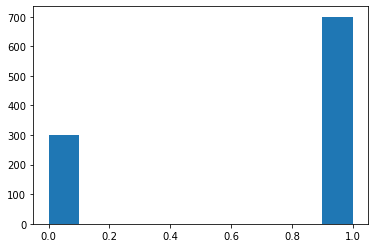

In [4]:
import matplotlib.pyplot as plt
plt.hist(data['Creditability'])

Von der Verteilung von der Zielvariable erfahren wir, dass wir mit einem unausgewogenen Datensatz zu tun haben. 70% der Personen im Datensatz hat "creditability" gleich 1, also sie als Personen klassifieziert wurden, die ihren einen potenziellen Kredit abzahlen sollen.

In [5]:
#check if there are any null data
data.isnull().any()

Creditability                        False
Account_Balance                      False
Duration_of_Credit_monthly           False
Payment_Status_of_Previous_Credit    False
Purpose                              False
Credit_Amount                        False
Value_Savings_Stocks                 False
Length_of_current_employment         False
Instalment_per_cent                  False
Sex_Marital_Status                   False
Guarantors                           False
Duration_in_Current_address          False
Most_valuable_available_asset        False
Age_years                            False
Concurrent_Credits                   False
Type_of_apartment                    False
No_of_Credits_at_this_Bank           False
Occupation                           False
No_of_dependents                     False
Telephone                            False
Foreign_Worker                       False
dtype: bool

Wir haben keine fehlenden Werte.

In [6]:
#extract the target variable
target=data['Creditability']

In [7]:
#drop the target variable column
data=data.drop(columns=['Creditability'])

In [8]:
data.columns

Index(['Account_Balance', 'Duration_of_Credit_monthly',
       'Payment_Status_of_Previous_Credit', 'Purpose', 'Credit_Amount',
       'Value_Savings_Stocks', 'Length_of_current_employment',
       'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors',
       'Duration_in_Current_address', 'Most_valuable_available_asset',
       'Age_years', 'Concurrent_Credits', 'Type_of_apartment',
       'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents',
       'Telephone', 'Foreign_Worker'],
      dtype='object')

### Preprocessing

In [9]:
#scale data, but onlty these columns that do not contain categories
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

data[['Duration_of_Credit_monthly','Credit_Amount','Length_of_current_employment','Duration_in_Current_address', 'Age_years']] = scaler.fit_transform(data[['Duration_of_Credit_monthly','Credit_Amount','Length_of_current_employment','Duration_in_Current_address', 'Age_years']])

In [10]:
#inspect data after preprocessing
display(data)

,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,0.205882,4,2,0.043964,1,0.25,4,2,1,1.000000,2,0.035714,3,1,1,3,1,1,1
1,1,0.073529,4,0,0.140255,1,0.50,2,3,1,0.333333,1,0.303571,3,1,2,3,2,1,1
2,2,0.117647,2,9,0.032519,2,0.75,2,2,1,1.000000,1,0.071429,3,1,1,2,1,1,1
3,1,0.117647,4,0,0.103004,1,0.50,3,3,1,0.333333,1,0.357143,3,1,2,2,2,1,2
4,1,0.117647,4,0,0.105700,1,0.50,4,3,1,1.000000,2,0.339286,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.294118,2,3,0.095576,1,0.50,2,3,1,1.000000,1,0.035714,3,1,1,2,2,1,1
996,1,0.294118,2,0,0.112964,1,1.00,4,3,2,0.000000,1,0.464286,3,2,1,3,1,1,1
997,4,0.250000,4,0,0.683944,5,1.00,4,3,1,1.000000,4,0.196429,3,3,1,4,1,2,1
998,2,0.117647,2,3,0.342137,5,0.00,2,3,1,0.000000,4,0.589286,3,2,1,4,1,2,1


### Train/test split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42, stratify=target)

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 485 to 504
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Account_Balance                    800 non-null    int64  
 1   Duration_of_Credit_monthly         800 non-null    float64
 2   Payment_Status_of_Previous_Credit  800 non-null    int64  
 3   Purpose                            800 non-null    int64  
 4   Credit_Amount                      800 non-null    float64
 5   Value_Savings_Stocks               800 non-null    int64  
 6   Length_of_current_employment       800 non-null    float64
 7   Instalment_per_cent                800 non-null    int64  
 8   Sex_Marital_Status                 800 non-null    int64  
 9   Guarantors                         800 non-null    int64  
 10  Duration_in_Current_address        800 non-null    float64
 11  Most_valuable_available_asset      800 non-null    int64

### Modelling

Wir fangen jetzt an, ein neuronales Netz zu bauen. Dafür wird mit Sequential() ein Container erstellt, in dem sequentiell die Ebenen des Modells definiert werden. Dabei wird mit name der Name des Layers, mit unit die Anzahl der Neuronen und mit activiation die Aktivierungsfunktion festgelegt.
InputLayer ist das erste Layer und sein input_shape muss gleich der Anzahl der Spalten sein.

In [13]:
model = tf.keras.models.Sequential([
   tf.keras.layers.InputLayer(input_shape=(20,)),
   tf.keras.layers.Dense(units=64, activation='relu'),
   tf.keras.layers.Dense(units=128, activation='relu'),
   tf.keras.layers.Dense(units=64, activation='relu'),
   tf.keras.layers.Dense(units=1, activation='sigmoid'),])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17,985
Trainable params: 17,985
Non-trainable params: 0
_________________________________________________________________


In [14]:
#create a folder to save logs
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [15]:
#configure model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Precision()])

Der Optimierer (Optimizer) hat die Aufgabe, auf Basis der berechneten Modellabweichungen der Kostenfunktion, die Gewichte und Biaswerte des Netzes während des Trainings anzupassen. Um dies zu tun, werden von TensorFlow sog. Gradienten der Kostenfunktion berechnet, die die Richtung anzeigen, in der die Gewichte und Biaswerte angepasst werden müssen, um die Kostenfunktion des Modells zu minimieren. Hier wird der sog. tf.AdamOptimizer()verwendet, der im Moment einer der am häufigsten angewendeten Optimierer ist. Adam steht für Adaptive moment estimation und ist eine methodische Kombination von zwei anderen Optimierungstechniken (AdaGrad und RMSProp).

Loss steht für die Verlustfuntion, mit der Residuals nach jeder Iteration berechnet werden. Binary-crossentropy ist eine häufig angewendete Verlustfunktion für binäre Klassifizierung.



In [16]:
#train model
model.fit(X_train, y_train, epochs=1000, validation_split=0.2, callbacks=[tensorboard_callback])

Epoch 1/1000


2022-09-28 18:46:57.248652: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


20/20 [==============================] - 0s 7ms/step - loss: 0.6255 - precision: 0.7106 - val_loss: 0.5573 - val_precision: 0.6646
Epoch 2/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.5459 - precision: 0.7243 - val_loss: 0.5126 - val_precision: 0.7338
Epoch 3/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.5272 - precision: 0.7423 - val_loss: 0.4954 - val_precision: 0.7812
Epoch 4/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.5179 - precision: 0.7735 - val_loss: 0.5136 - val_precision: 0.7203
Epoch 5/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.5042 - precision: 0.7677 - val_loss: 0.5000 - val_precision: 0.7669
Epoch 6/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.4945 - precision: 0.7784 - val_loss: 0.5030 - val_precision: 0.7324
Epoch 7/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.4884 - precision: 0.7741 - val_loss: 0.4986 - val_precision: 0.7805
Epoch

Nachdem die notwendigen Bestandteile des neuronalen Netzes definiert wurden, können diese nun im Rahmen des Modelltrainings miteinander verbunden werden. Das Training von neuronalen Netzen läuft in Epochen (Trainingsrunden). Jede Beobachtung im Datensatz  wird für eine Trainingsrunde nur einmal dem Netz präsentiert. Die Anzahl der Epochen wird ebenfalls als Parameter durch den Anwender definiert.

In [17]:
%load_ext tensorboard

In [18]:
%tensorboard --logdir logs

Wenn es kein Tensorboard im Editor zu sehen ist, kann man es in einem Browser unter der Adresse *localhost:6006* aufrufen.

### Evaluation

In [19]:
#evaluate the model
score = model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 807us/step - loss: 5.5064 - precision: 0.7929
